In [1]:
#Importando as bibliotecas
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
matplotlib.rcParams['image.cmap'] = 'gray'
#%matplotlib inline

DATA_PATH = r"D:\Estudos\OpenCV\Computer Vision - Introduction\w9 - Video Analysis\data"

In [2]:
videoFileName  = DATA_PATH + r"\videos\cycle.mp4"

cap = cv2.VideoCapture(videoFileName)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

out = cv2.VideoWriter('sparse-output.mp4',cv2.VideoWriter_fourcc(*'MP4V'),
                      20, (width,height))

In [3]:
numCorners = 100

feature_params = dict( maxCorners = numCorners,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

In [4]:
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

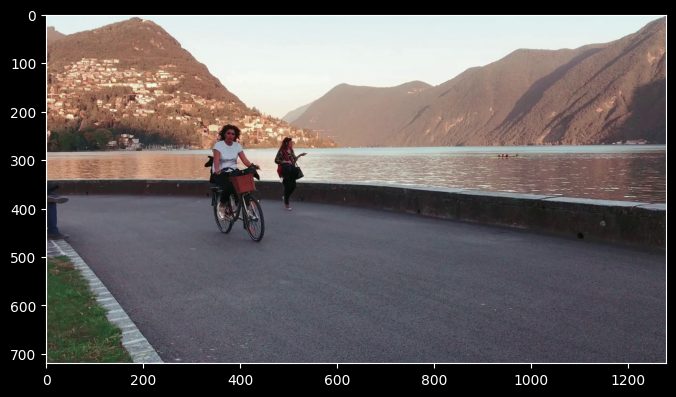

In [5]:
# Create some random colors
color = np.random.randint(0,255,(numCorners,3))

# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
old_points = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
plt.imshow(old_frame[:,:,::-1]);

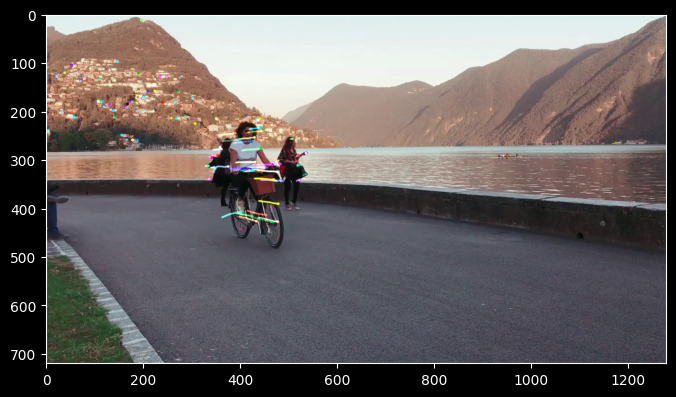

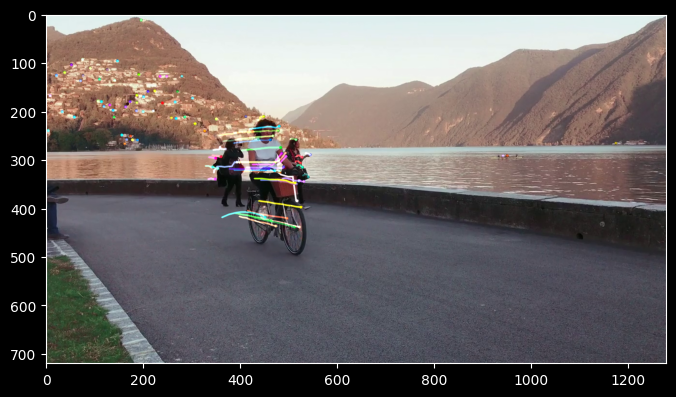

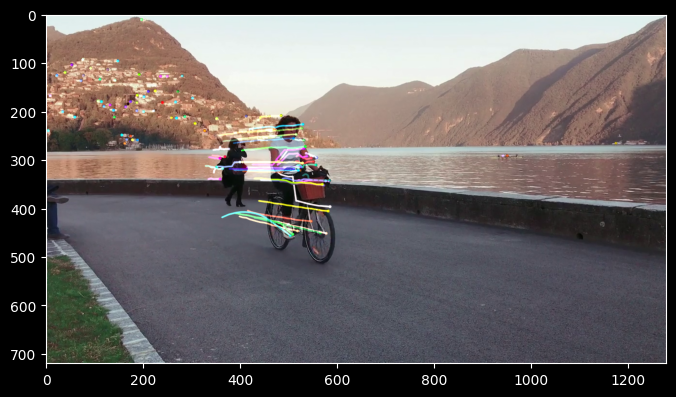

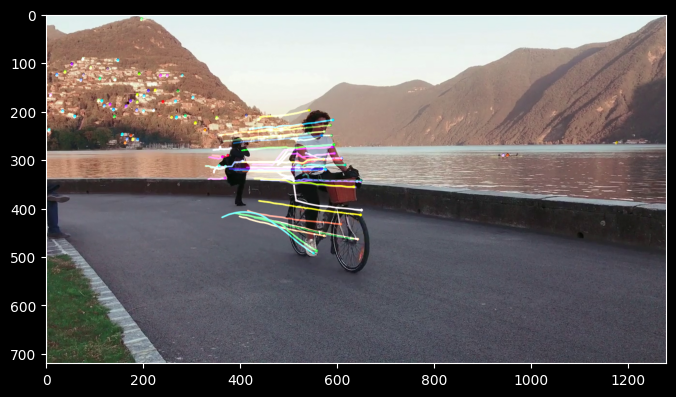

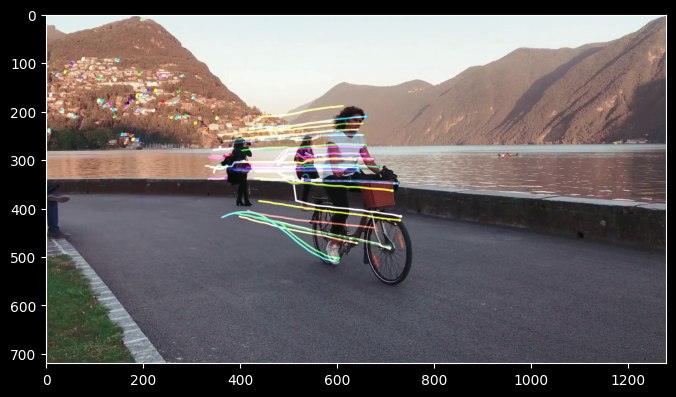

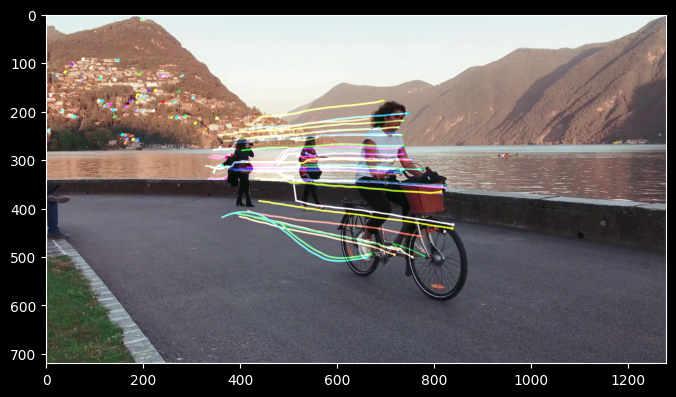

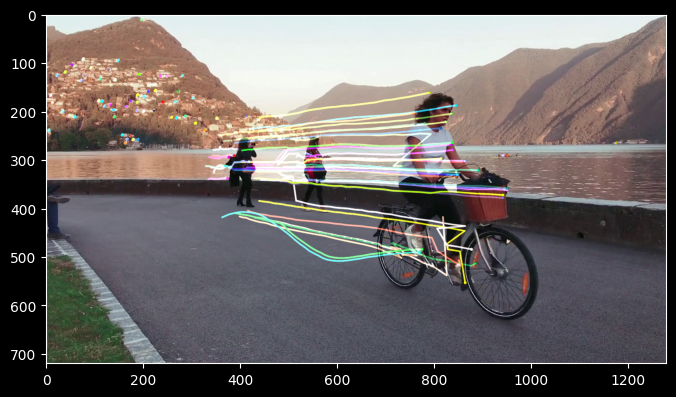

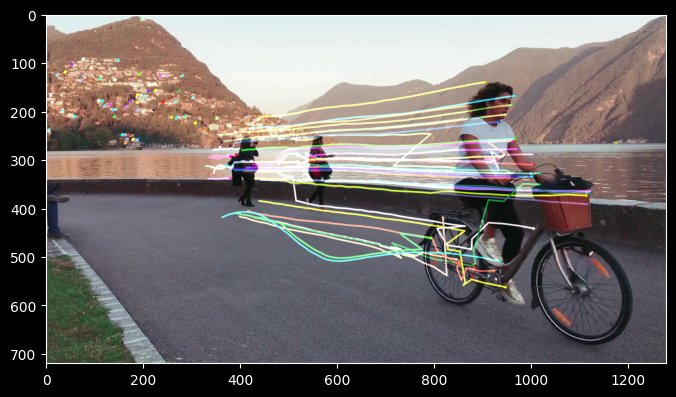

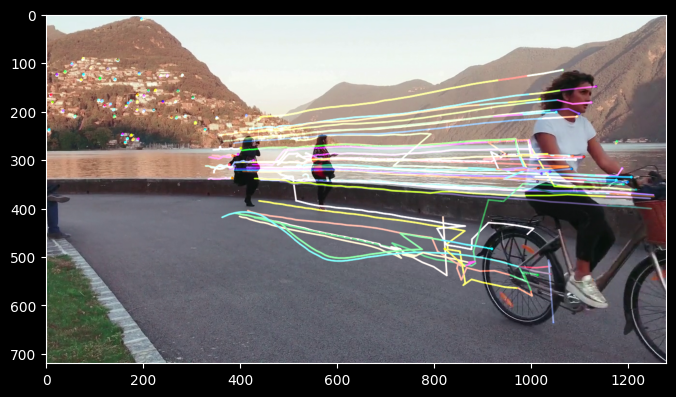

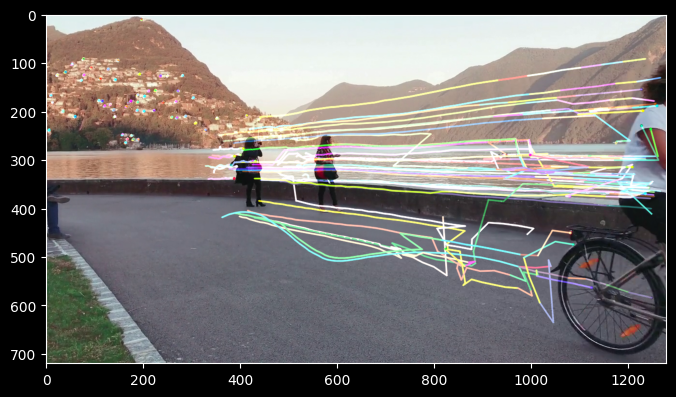

In [6]:
# Create a mask image for drawing the tracks
mask = np.zeros_like(old_frame)
count = 0

while(1):
    ret,frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    count += 1
    # calculate optical flow
    new_points, status, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, old_points, None, **lk_params)

    # Select good points
    good_new = new_points[status==1]
    good_old = old_points[status==1]

    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new, good_old)):
        a,b = new.ravel()
        c,d = old.ravel()

        # convert to integers
        a, b, c, d = map(int, [a, b, c, d])

        cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2, cv2.LINE_AA)
        cv2.circle(frame,(a,b),3,color[i].tolist(), -1)


    # display every 5th frame
    display_frame = cv2.add(frame,mask)
    out.write(display_frame)
    if count % 5 == 0:
        plt.imshow(display_frame[:,:,::-1])
        plt.show()
    if count > 50:
        break
    #     k = cv.waitKey(30) & 0xff
    #     if k == 27:
    #         break

    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    old_points = good_new.reshape(-1,1,2)

In [7]:
cap.release()
out.release()

https://docs.opencv.org/4.1.0/d7/d8b/tutorial_py_lucas_kanade.html
https://en.wikipedia.org/wiki/Optical_flow
https://nanonets.com/blog/optical-flow/
https://www.youtube.com/watch?v=7soIa95QNDk